# Part II - Risk Factors of Cardiovascular Disease
## by Kafayat Saka


## Investigation Overview


> In this investigation I wanted to look at the main features in the cardiovascular dataset that had the strongest indication for diagnosis of having a cardiovascular disease.

The key insights gotten were:

  > 1) The amount of Females that have cardiovascular diseases is about 14,000 more than the males that have this cardiovascular disease. 

 This was first explored by checking the general population plot where I discovered that approximately 50% of the population had and the other 50% did not have cardiovasculr disease. I furthered explored the distribution with gender where I observed and concluded that more females have cardiovascular diseases than the males.


> 2) Most Patients in the distribution have a BMI greater than 25: 
 
   This was suspected from the first exploration of the bmi variable alone, After plotting the relationship with weight, it showed a large distribution of patients fell into the bmi greater than 25.

> 3) Patients with BMI greater than 25kg/m2 and Weight above 80kg have cardiovascular disease:

This finding was concluded from exploring the individual variables, i.e the weight, bmi and cardiovascular disease,with plots, then the relationship between Bmi and weight and the final exploration of the relationship between all three variables using scattered plots.

> 4) A large distribution of the patients have high blood pressure.

This finding was concluded from exploring the systolic and diastolic variables individually then their relationship together where a positive correlation was noticed too. A final scatter plot was plotted to see the relationship between all three variables.
## Dataset Overview

> This dataset cosisted of 70,000 records of patients id, age,gender, height,weight,systolic, diastolic, cholesterol levels, glucose levels, smoking habits, alcohol intake ,physical activities. I featured engineered a new column called BMI and also created a new subset of data removing extreme outliers of the systolic and diastolic variables for better consistency in plotting.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
#load in the dataset 
cardio = pd.read_csv('cardio_clean.csv')
cardio_bp = pd.read_csv('cardio_bp.csv')

## Distribution of gender  population with cardiovascular disease

Have you ever wondered what gender is more likely to get a cardiovascula disease?

To answer this question i created a bar chart that shows a comparison between male and female gender with cardiovascular diseases and without. The gender distribution of this dataset shows that more than 20,000 females have cardiovascular disease which is more than the  about 13,000 males that have cardiovascular diseases.

Practices amongst females should be studied to know what predisposes them more to it.

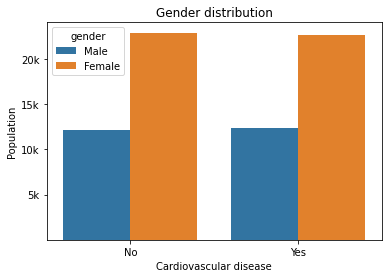

In [28]:
#using seaborns countplot 
sb.countplot(data = cardio,x='cv_disease',hue='gender')
#Setting ticks and labels
ticks= [5000,10000,15000,20000]
labels =['5k','10k','15k','20k']
plt.yticks(ticks,labels)
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Population');

## Distribution of BMI in the population.

 I wanted to find out what the distribution of BMI looked like,and after plotting an histogram plot it shows that the bmi with the largest distribution is around 24. 

This was suspected from the first exploration of the bmi variable alone. After plotting the relationship with weight, it showed and confirmed a large distribution of patients fell into the bmi greater than 25.

This is to say a large amount of patients fall into the overweight and obses category according to the International BMI scale.

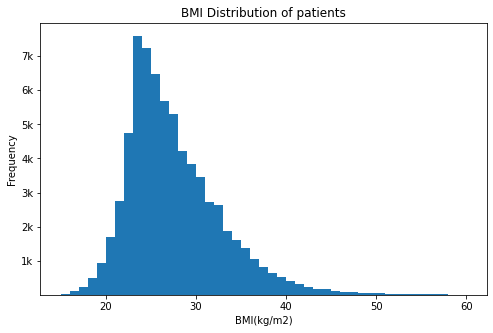

In [29]:
#Using a standard hist plot and setting bin size
binsize = 1
bin_edge = np.arange(15,60+binsize,binsize)
plt.figure(figsize=[8,5])
plt.hist(data= cardio, x ='bmi',bins=bin_edge)
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
plt.yticks(ticks,labels)

plt.title('BMI Distribution of patients')
plt.xlabel('BMI(kg/m2)')
plt.ylabel('Frequency')
plt.show()

## Relationship between BMI, Weight and Cardiovascular disease

After finding out that most of the patients had a high bmi, a scatter plot was made to see the relationship with weight. In this plot, weight and bmi had a positive correlation. But that was not enough to conclude a relationship with a cardiovascular disease. So the 3 variables were plotted all together. 

The conclusion from observation was that Patients with BMI greater than 25kg/m2 and Weight above 80kg have cardiovascular disease.

In [30]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(cardio.shape[0],500,replace = False)
cardio_subset = cardio.iloc[sample]

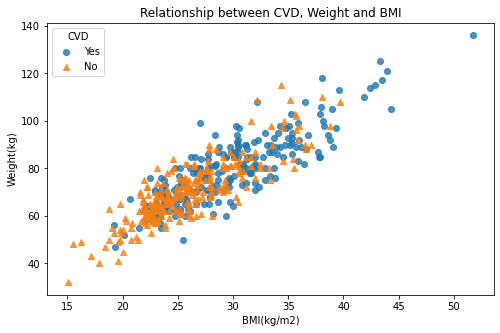

In [31]:
#setting my figure size
plt.figure(figsize=[8,5])
#Creating markers for the categories
cvd_markers =[['Yes','o'],['No','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cv_disease']== cvd]
    sb.regplot(data = plot_data,x='bmi',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker)
    
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI(kg/m2)')
plt.ylabel('Weight(kg)')
plt.legend(['Yes','No'],title = 'CVD');

## Relationship between Systolic, Diastolic and Cardiovascular disease

4) A large distribution of the patients have high blood pressure.

This finding was concluded from exploring the systolic and diastolic variables individually then their relationship together where a positive correlation was noticed too. A final scatter plot was plotted to see the relationship between all three variables.

In [32]:
#creating a categorical version of diastolic, using floor division(lowest integer divisor)
cardio_bp['diastolic_category'] =((cardio_bp['diastolic']//10)*10).astype(int)

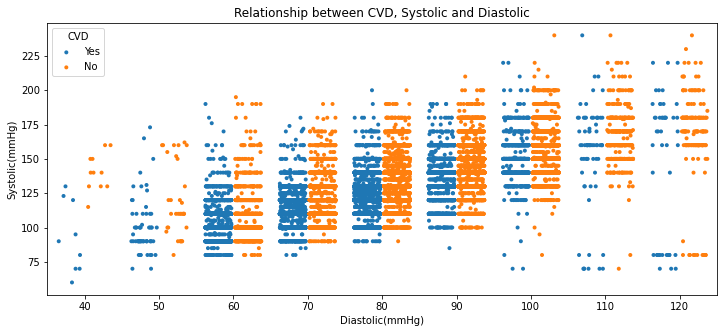

In [33]:
#Using seaborns stripplot and setting figuresize
plt.figure(figsize=[12,5])
sb.stripplot(data=cardio_bp,x='diastolic_category',y = 'systolic',hue='cv_disease',jitter = 0.35,dodge = True,size=4)
#setting title and axis labels
plt.title('Relationship between CVD, Systolic and Diastolic')
plt.xlabel('Diastolic(mmHg)')
plt.ylabel('Systolic(mmHg)')
plt.legend(['Yes','No'],title='CVD');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt